In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

df = pd.read_csv("crop.csv")
df

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,CROP
0,90.000000,42.000000,43.000000,21.000000,82.000000,6.500000,203.000000,rice
1,85.000000,58.000000,41.000000,22.000000,80.000000,7.000000,227.000000,rice
2,60.000000,55.000000,44.000000,23.000000,82.000000,7.800000,264.000000,rice
3,74.000000,35.000000,40.000000,26.000000,80.000000,7.000000,243.000000,rice
4,78.000000,42.000000,42.000000,20.000000,82.000000,7.600000,263.000000,rice
...,...,...,...,...,...,...,...,...
2396,43.685741,13.449040,253.415466,15.931577,46.977683,7.081783,256.922983,wheat
2397,42.824988,12.371845,258.921071,17.359929,45.463647,6.974514,256.266133,wheat
2398,47.581428,12.574671,258.296629,15.270635,40.512941,7.044163,252.189214,wheat
2399,41.915093,14.054842,259.211594,14.775843,40.876699,7.375927,250.862623,wheat


In [20]:
!pip install pandas_profiling

     -------------------------------------- 324.4/324.4 kB 9.8 MB/s eta 0:00:00
     ------------------------------------- 353.0/353.0 kB 11.1 MB/s eta 0:00:00
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
     ---------------------------------------- 152.1/152.1 kB ? eta 0:00:00
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.1/2.1 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 663.4/663.4 kB 8.4 MB/s eta 0:00:00
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=1cc05870cb14830c8e02d3e52d295a9c6fb2d098063d919

In [22]:
from pandas_profiling import ProfileReport

In [25]:
crop_report = ProfileReport(df)

In [26]:
crop_report.to_file("crop_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
features = df.iloc[:,:7].values
labels = df["CROP"]





In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size = 0.25)
print("X_training dataset")
print(X_train)
print("X_test dataset")
print(X_test)
print("Y_training dataset")
print(Y_train)
print("Y_test dataset")
print(Y_test)

X_training dataset
[[ 37.          64.          22.         ...  19.           6.
  122.        ]
 [ 98.96487904   4.34045559 223.5187992  ...  44.9184072    6.86864798
  147.7576598 ]
 [121.          36.          24.         ...  82.           7.4
   99.        ]
 ...
 [ 87.          28.          30.         ...  69.           6.5
  169.        ]
 [104.          35.          28.         ...  51.           7.
  144.        ]
 [116.          40.          33.         ...  54.           7.
  130.        ]]
X_test dataset
[[107.   31.   31.  ...  53.    6.8 153. ]
 [ 48.   62.   15.  ...  67.    7.5  66. ]
 [ 86.   39.   43.  ...  71.    6.4 193. ]
 ...
 [ 93.   91.   47.  ...  83.    6.1 117. ]
 [ 19.   26.   29.  ...  99.    5.7 167. ]
 [115.   11.   46.  ...  89.    6.6  40. ]]
Y_training dataset
323     kidneybeans
2248      sugarcane
1920         cotton
1256         grapes
1756         papaya
           ...     
1477      muskmelon
1706         papaya
2158         coffee
2184         

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
acc = []
model = []


# Decision Tree 

In [33]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(random_state = 42)
DecisionTree.fit(X_train,Y_train)
predicted_values = DecisionTree.predict(X_test)
print(predicted_values)
x = metrics.accuracy_score(Y_test,predicted_values)
acc.append(x)
model.append("Decision Tree")
print("Decision Tree's accuracy is: {}%".format(x * 100))
print(classification_report(Y_test,predicted_values))


['coffee' 'blackgram' 'jute' 'maize' 'pomegranate' 'pomegranate'
 'blackgram' 'lentil' 'mothbeans' 'wheat' 'maize' 'mothbeans' 'wheat'
 'lentil' 'chickpea' 'coffee' 'lentil' 'sugarcane' 'sugarcane' 'mungbean'
 'rice' 'wheat' 'watermelon' 'mango' 'grapes' 'apple' 'mothbeans' 'cotton'
 'coffee' 'cotton' 'coffee' 'kidneybeans' 'sugarcane' 'banana' 'orange'
 'mango' 'orange' 'coffee' 'kidneybeans' 'chickpea' 'rice' 'rice'
 'mothbeans' 'coffee' 'muskmelon' 'jute' 'coconut' 'jute' 'sugarcane'
 'mothbeans' 'blackgram' 'coconut' 'apple' 'apple' 'cotton' 'lentil'
 'grapes' 'coffee' 'apple' 'coffee' 'apple' 'pigeonpeas' 'mungbean'
 'coconut' 'papaya' 'cotton' 'cotton' 'pigeonpeas' 'mothbeans' 'coconut'
 'coffee' 'apple' 'chickpea' 'pomegranate' 'banana' 'apple' 'banana'
 'mango' 'papaya' 'apple' 'banana' 'mungbean' 'grapes' 'mango' 'mungbean'
 'grapes' 'apple' 'maize' 'mothbeans' 'blackgram' 'banana' 'pomegranate'
 'blackgram' 'wheat' 'mango' 'maize' 'apple' 'muskmelon' 'kidneybeans'
 'cotton' '

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter = 100)

LogReg.fit(X_train,Y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's accuracy is: {}%".format(x * 100))
print(classification_report(Y_test,predicted_values))

Logistic Regression's accuracy is: 92.34608985024958%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        28
   blackgram       0.83      0.86      0.85        29
    chickpea       1.00      1.00      1.00        19
     coconut       0.90      1.00      0.95        27
      coffee       1.00      1.00      1.00        24
      cotton       0.96      1.00      0.98        22
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.72      0.84        25
 kidneybeans       0.88      1.00      0.94        30
      lentil       0.77      0.96      0.86        25
       maize       1.00      0.95      0.97        19
       mango       0.83      1.00      0.91        24
   mothbeans       1.00      0.74      0.85        27
    mungbean       0.97      1.00      0.98        28
   muskmelon       0.93      1.00      0.96        26
      orange       1.00    

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

RF's Accuracy is:  0.9950083194675541
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        30
        jute       0.92      0.96      0.94        25
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        19
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00

# XGBoost

In [13]:

import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,Y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("Logistic Regression's accuracy is: {}%".format(x * 100))

print(classification_report(Y_test,predicted_values))

[15:12:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aryan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Logistic Regression's accuracy is: 99.16805324459234%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        28
   blackgram       0.97      1.00      0.98        29
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        30
        jute       0.96      0.96      0.96        25
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        19
       mango       0.92      1.00      0.96        24
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00    

# Support Vector Machine

In [14]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's accuracy is: {}%".format(x * 100))

print(classification_report(Y_test,predicted_values))

SVM's accuracy is: 98.00332778702163%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        28
   blackgram       0.91      1.00      0.95        29
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.96      0.98        24
      cotton       1.00      0.95      0.98        22
      grapes       1.00      1.00      1.00        30
        jute       0.80      0.96      0.87        25
 kidneybeans       0.97      1.00      0.98        30
      lentil       1.00      1.00      1.00        25
       maize       0.95      1.00      0.97        19
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00

In [15]:
print(acc)
print(model)

[0.8618968386023295, 0.9234608985024958, 0.9950083194675541, 0.9916805324459235, 0.9800332778702163]
['Decision Tree', 'Logistic Regression', 'RF', 'XGBoost', 'SVM']


# Comapring Accuracies of models

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

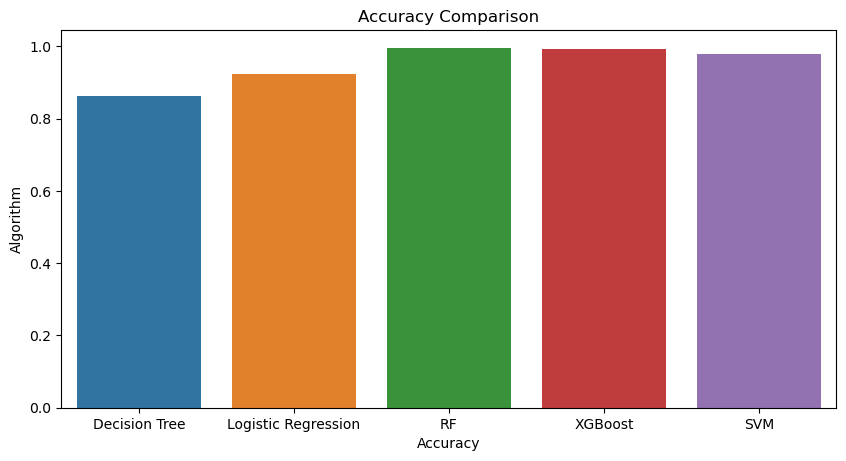

In [16]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = model,y = acc)

In [17]:
am = dict(zip(model,acc))
for x,y in am.items():
    print("{0} -> {1}".format(x,y))

Decision Tree -> 0.8618968386023295
Logistic Regression -> 0.9234608985024958
RF -> 0.9950083194675541
XGBoost -> 0.9916805324459235
SVM -> 0.9800332778702163


In [18]:
#as we can see Naive Bayes and Random Forest are having the highest accuracy
#For Our Case we will use Random Forest

# Example of prediciton using Random Forest

In [19]:
data = np.array([[59,70,84,17,19,7.6,83]]) #input by the user
data = scaler.transform(data)
prediction = RF.predict(data) #random forest model predicts the best crop for the given parameters provided by the user
print(prediction)

['chickpea']
